In [7]:
import pandas as pd
import numpy as np
import ultraplot as pplt

import os

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

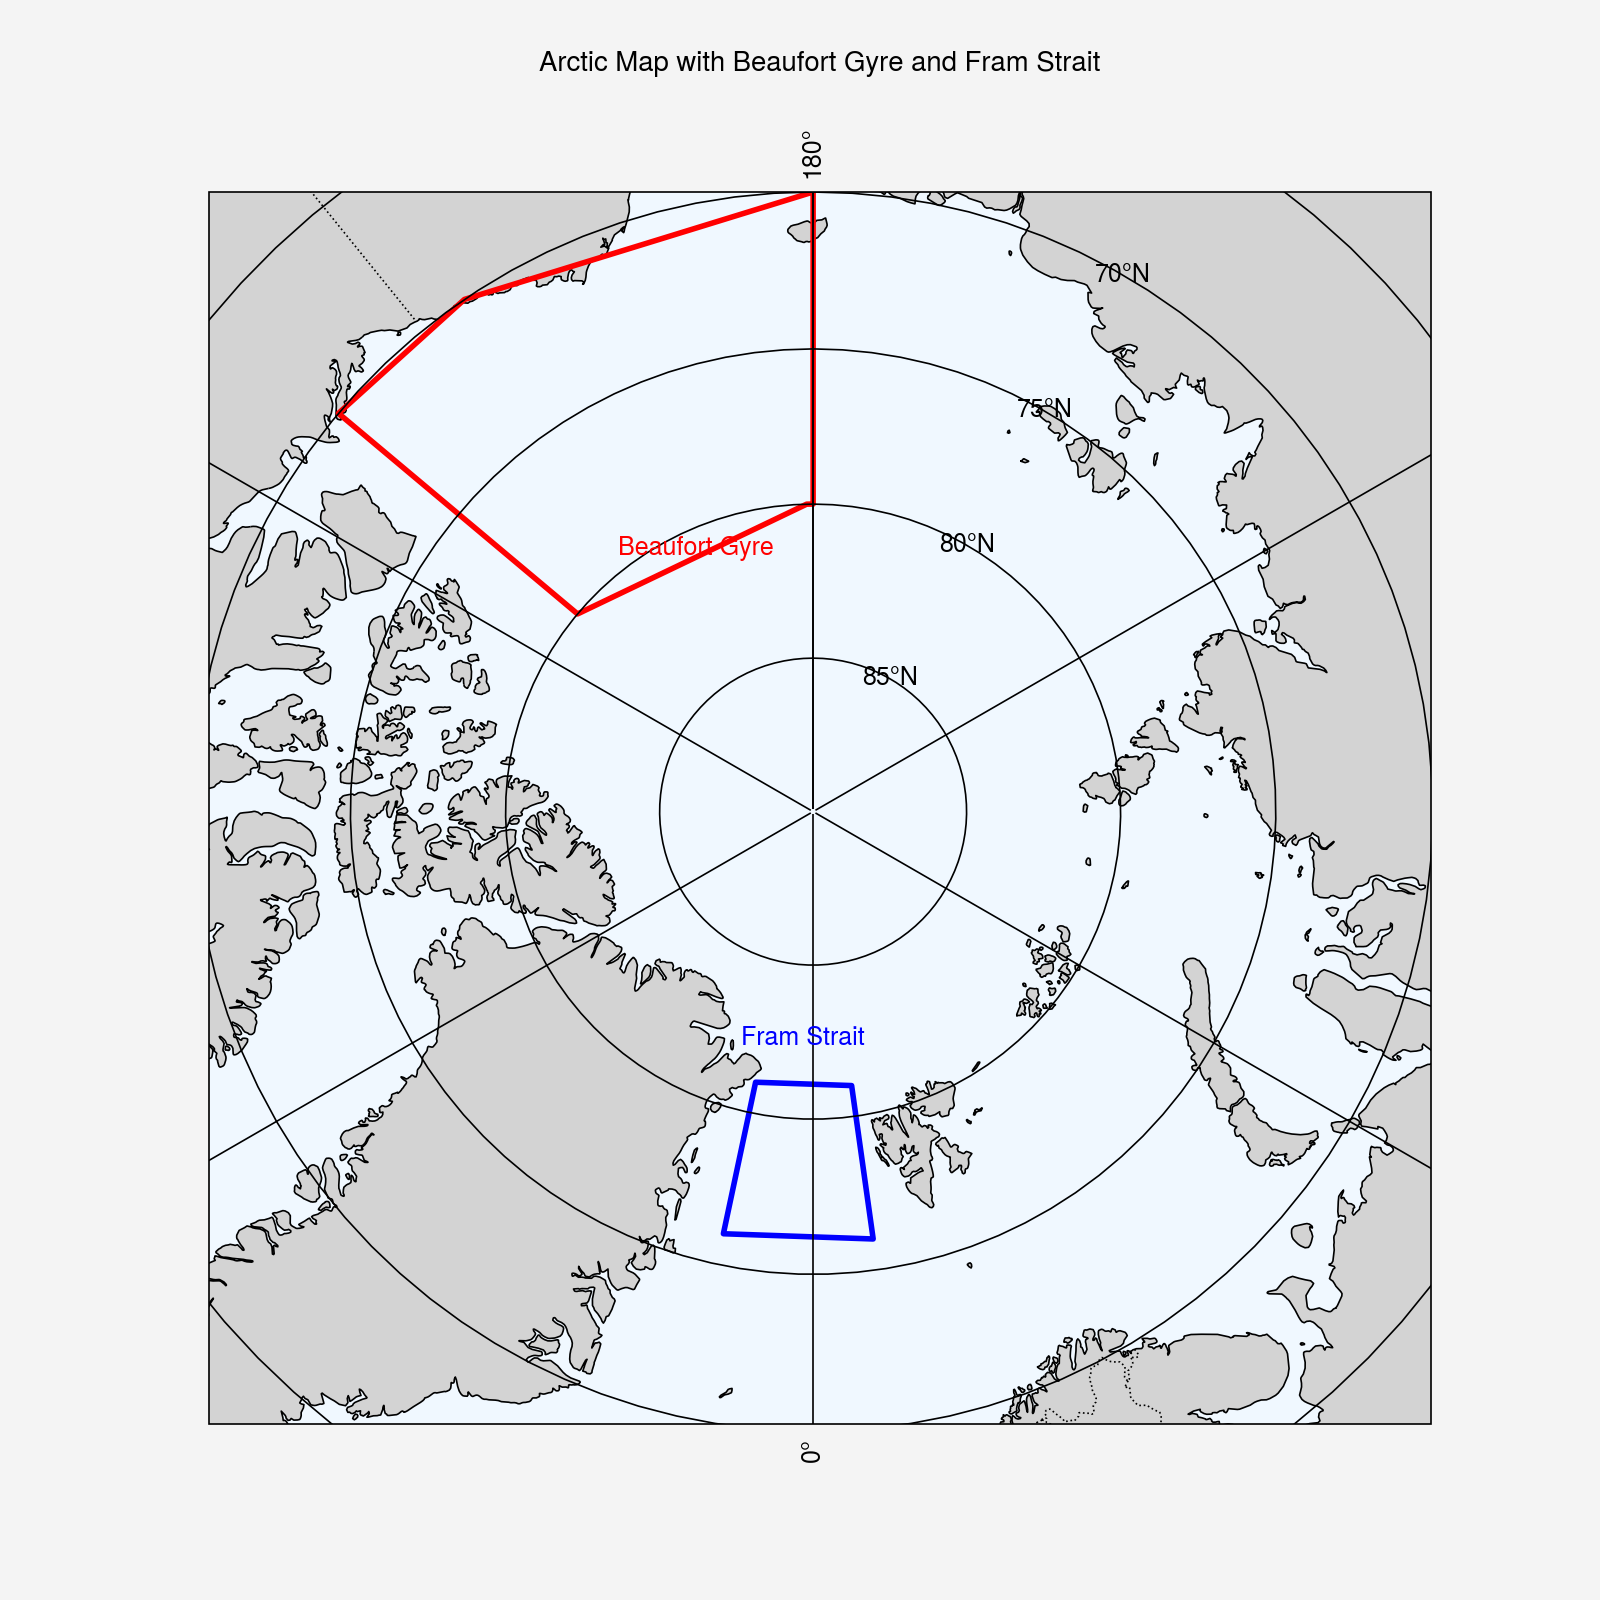

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box
from cartopy.feature import ShapelyFeature

# Define Beaufort Gyre (approximate)
beaufort = {
    "lon_min": -180,
    "lon_max": -130,
    "lat_min": 70,
    "lat_max": 80
}

# Define Fram Strait (approximate)
fram = {
    "lon_min": -12,   # west of Svalbard
    "lon_max": 8,     # east of Greenland
    "lat_min": 76,
    "lat_max": 81
}

# Create the map
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)
ax.set_extent([-180, 180, 70, 90], crs=ccrs.PlateCarree())

# Add base features
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add Beaufort Gyre box
beaufort_box = box(beaufort["lon_min"], beaufort["lat_min"],
                   beaufort["lon_max"], beaufort["lat_max"])
beaufort_feature = ShapelyFeature([beaufort_box], ccrs.PlateCarree(),
                                  edgecolor='red', facecolor='none', linewidth=2)
ax.add_feature(beaufort_feature)
ax.text(-155, 81, "Beaufort Gyre", transform=ccrs.PlateCarree(),
        ha='center', va='bottom', color='red', fontsize=9)

# Add Fram Strait box
fram_box = box(fram["lon_min"], fram["lat_min"],
               fram["lon_max"], fram["lat_max"])
fram_feature = ShapelyFeature([fram_box], ccrs.PlateCarree(),
                              edgecolor='blue', facecolor='none', linewidth=2)
ax.add_feature(fram_feature)
ax.text(-2.5, 82.2, "Fram Strait", transform=ccrs.PlateCarree(),
        ha='center', va='bottom', color='blue', fontsize=9)

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

plt.title("Arctic Map with Beaufort Gyre and Fram Strait", pad=20)
plt.show()